## Итоговая работа.

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
import sklearn.metrics as metrics
from numpy import dot
from numpy.linalg import norm
from scipy import sparse
from sklearn.decomposition import IncrementalPCA

### Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [27]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
cosine_distances = pairwise_distances(raitings, metric='cosine')
cosine_distances

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [6]:
for i in range(cosine_distances.shape[0]):
    min_val = np.min(cosine_distances[i, np.nonzero(cosine_distances[i])])
    print(' Для пользователя с индексом',i, 'наиболее похожий пользователь', list(cosine_distances[i]).index(min_val))

 Для пользователя с индексом 0 наиболее похожий пользователь 8
 Для пользователя с индексом 1 наиболее похожий пользователь 4
 Для пользователя с индексом 2 наиболее похожий пользователь 9
 Для пользователя с индексом 3 наиболее похожий пользователь 9
 Для пользователя с индексом 4 наиболее похожий пользователь 8
 Для пользователя с индексом 5 наиболее похожий пользователь 9
 Для пользователя с индексом 6 наиболее похожий пользователь 3
 Для пользователя с индексом 7 наиболее похожий пользователь 5
 Для пользователя с индексом 8 наиболее похожий пользователь 0
 Для пользователя с индексом 9 наиболее похожий пользователь 2


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [29]:
# использую sklearn.decomposition для уменьшения размерности и выборки только 5 значений из 15
ipca = IncrementalPCA(n_components = 5, batch_size = 10)
ipca.fit(raitings)
IncrementalPCA(batch_size = 10, n_components = 5)
raitings_5values = ipca.transform(raitings) 

In [30]:
raitings_5values

array([[ 5.30986101,  1.92919845,  4.93300027, -2.70188013, -5.50497886],
       [-2.87763403,  2.71659559, -1.40592782, -7.26325751,  4.50322291],
       [ 4.94010408, -6.68861167,  0.94550184, -3.61556661,  0.68969272],
       [-5.14939908, -6.28027284,  4.65978558, -1.09024004,  1.01471112],
       [ 1.37488691,  7.54357985, -4.00834369, -2.1284001 ,  0.16324949],
       [-2.65341956, -3.77075601, -8.58430748,  1.46628319, -1.67401769],
       [-8.61573944,  3.78603335,  4.02721027,  4.37582577,  3.13880277],
       [-5.39658258, -1.0170466 , -1.01456742,  1.89512837, -6.54883538],
       [ 5.7843488 ,  5.29857107,  1.48083611,  3.71295542, -0.21312695],
       [ 7.2835739 , -3.51729118, -1.03318766,  5.34915166,  4.43127987]])

In [31]:
cosine_distances_5values = pairwise_distances(raitings_5values, metric='cosine')
cosine_distances_5values

array([[0.        , 1.24000183, 0.72943975, 1.20807522, 0.91970533,
        1.6036918 , 1.42550604, 1.05494705, 0.5384084 , 1.11616049],
       [1.24000183, 0.        , 1.04995361, 0.95908312, 0.54788397,
        1.09170081, 0.89315118, 1.34632834, 1.38470728, 1.47019866],
       [0.72943975, 1.04995361, 0.        , 0.70448401, 1.48660118,
        1.02691552, 1.73510749, 1.39946332, 1.23643023, 0.56860631],
       [1.20807522, 0.95908312, 0.70448401, 0.        , 1.83613716,
        1.06282339, 0.65558972, 0.7518088 , 1.7236978 , 1.21235605],
       [0.91970533, 0.54788397, 1.48660118, 1.83613716, 0.        ,
        1.01210698, 1.07983268, 1.20535141, 0.56615058, 1.24135105],
       [1.6036918 , 1.09170081, 1.02691552, 1.06282339, 1.01210698,
        0.        , 1.21472612, 0.53901885, 1.4798575 , 0.9698217 ],
       [1.42550604, 0.89315118, 1.73510749, 0.65558972, 1.07983268,
        1.21472612, 0.        , 0.74202354, 1.08083406, 1.34637949],
       [1.05494705, 1.34632834, 1.3994633

In [32]:
# Результат при сжатии признаковых описаний пользователя с 15 фильмов, до 5-ти

for i in range(cosine_distances_5values.shape[0]):
    min_val = np.min(cosine_distances_5values[i, np.nonzero(cosine_distances_5values[i])])
    print(' Для пользователя с индексом',i, 'наиболее похожий пользователь', list(cosine_distances_5values[i]).index(min_val))

 Для пользователя с индексом 0 наиболее похожий пользователь 8
 Для пользователя с индексом 1 наиболее похожий пользователь 4
 Для пользователя с индексом 2 наиболее похожий пользователь 9
 Для пользователя с индексом 3 наиболее похожий пользователь 6
 Для пользователя с индексом 4 наиболее похожий пользователь 1
 Для пользователя с индексом 5 наиболее похожий пользователь 7
 Для пользователя с индексом 6 наиболее похожий пользователь 3
 Для пользователя с индексом 7 наиболее похожий пользователь 5
 Для пользователя с индексом 8 наиболее похожий пользователь 0
 Для пользователя с индексом 9 наиболее похожий пользователь 8


### Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [10]:
import numpy as np
from sympy import *
from scipy.misc import derivative

In [11]:
x = symbols('x') 
x_ex = tan(sin(x) + cos(2*x + 3))**2
x_ex

tan(sin(x) + cos(2*x + 3))**2

In [12]:
# нахожу производную
derivative_ = diff(x_ex)
derivative_

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [15]:
# нахожу в точке 𝑥 = 1
def f(x):
    return tan(sin(x) + cos(2*x + 3))**2
derivative(f, 1.0, dx=1e-6)

55.3859176433136

In [17]:
from IPython.display import Image

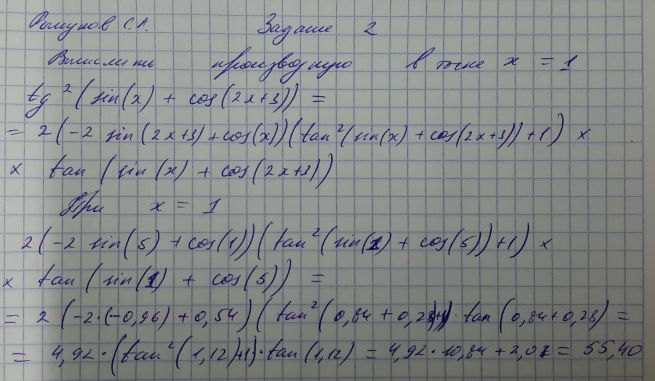

In [18]:
Image('task2MDS.jpg')

### Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [2]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [3]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [4]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

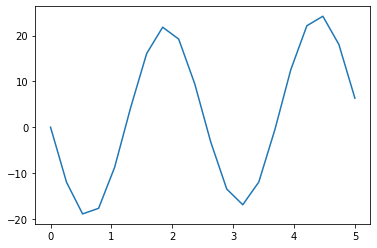

In [5]:
plt.plot(x, fx)
plt.show()

In [6]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [7]:
from scipy.optimize import minimize

In [9]:
res = minimize(error,(0,0), method='COBYLA')
print('Oптимальные параметры a, b, минимизирующие абсолютную ошибку',res.x )

Oптимальные параметры a, b, минимизирующие абсолютную ошибку [ 3.00018796 -2.50008926]


### Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [19]:
np.random.sample(20)

array([0.42201977, 0.53541161, 0.64001932, 0.5855936 , 0.90359081,
       0.68234564, 0.15073857, 0.08274663, 0.69657913, 0.94928725,
       0.88489478, 0.09146062, 0.44051789, 0.69696577, 0.40023321,
       0.26754606, 0.87386414, 0.3340461 , 0.67591312, 0.90019894])

In [21]:
# создаю выборку размера sub_sample_size 1000 раз и записываю её в массив tab по которому далее строю гистограмму 
tab = []
task_size = 50
for i in range(1000):
    rez = np.random.sample(task_size)
    tab.append(rez.mean())

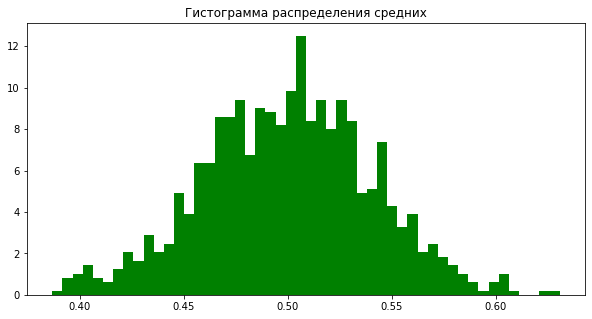

In [25]:
plt.figure(figsize = (10, 5))
plt.hist(tab,50, density = 1, facecolor='g')
plt.title(r'Гистограмма распределения средних')
plt.show()

### Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

m = np.array([[1, 4],
              [1, 1]])  
print(m)

In [33]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [34]:
w, v = np.linalg.eig(m)

In [35]:
w

array([ 3., -1.])

In [36]:
v

array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])

In [37]:
for i in range(len(w)):
    print("Собственное значение λ  = " + str(w[i])) 
    print("соответствующий ему собственный вектор " + str(v[:,i]))
    print(' *** ')

Собственное значение λ  = 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
 *** 
Собственное значение λ  = -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
 *** 


In [42]:
from IPython.display import Image

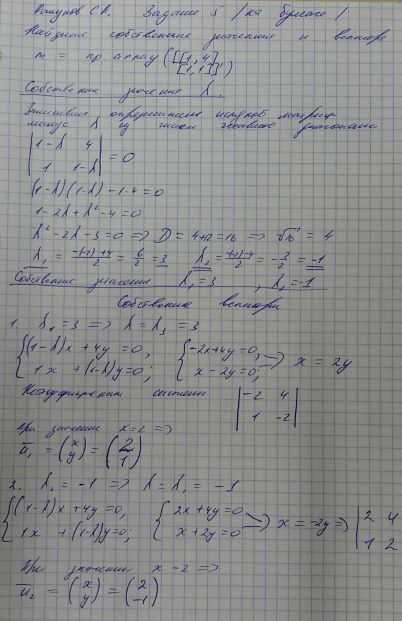

In [47]:
Image('task5MDS.jpg')